In [1]:
!pip install watson-machine-learning-client

In [2]:
#import basic libraries for preprocessing and EDA
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format='{:.5f}'.format
import warnings
import math
#import libraries for pipelining
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
#import libraries for train and test
from sklearn.model_selection import train_test_split
#importExtraTreeRegressor for model fit and prediction
from sklearn.ensemble import ExtraTreesRegressor
#import libraries for accuracy and error caluclation
from sklearn.metrics import mean_squared_error,r2_score
#import libraries for model building and deployement
from watson_machine_learning_client import WatsonMachineLearningAPIClient


2020-06-11 10:39:53,877 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


# IMPORT DATASET

In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ef318286c3ae41618e281985a79980ac = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='6oIE5sg1IyhQdaHX-SaDhTF-vIaACikKkbBNK_MYC7tY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_ef318286c3ae41618e281985a79980ac.get_object(Bucket='predictinglifeexpectancy-donotdelete-pr-s8treghb64f3lg',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.00000,263.00000,62,0.01000,71.27962,65.00000,1154,...,6.00000,8.16000,65.00000,0.10000,584.25921,33736494.00000,17.20000,17.30000,0.47900,10.10000
1,Afghanistan,2014,Developing,59.90000,271.00000,64,0.01000,73.52358,62.00000,492,...,58.00000,8.18000,62.00000,0.10000,612.69651,327582.00000,17.50000,17.50000,0.47600,10.00000
2,Afghanistan,2013,Developing,59.90000,268.00000,66,0.01000,73.21924,64.00000,430,...,62.00000,8.13000,64.00000,0.10000,631.74498,31731688.00000,17.70000,17.70000,0.47000,9.90000
3,Afghanistan,2012,Developing,59.50000,272.00000,69,0.01000,78.18422,67.00000,2787,...,67.00000,8.52000,67.00000,0.10000,669.95900,3696958.00000,17.90000,18.00000,0.46300,9.80000
4,Afghanistan,2011,Developing,59.20000,275.00000,71,0.01000,7.09711,68.00000,3013,...,68.00000,7.87000,68.00000,0.10000,63.53723,2978599.00000,18.20000,18.20000,0.45400,9.50000


# DATA PREPROCESSING

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.rename(columns={'Income composition of resources':'Income',
                      ' thinness  1-19 years':'Thinness 10-19 years',
                     ' thinness 5-9 years':'Thinness 5-9 years',
                      'percentage expenditure':'Health expenditure percentage',
                      'Total expenditure':'Government expenditure',
                      ' BMI ':'BMI'},inplace=True)

In [6]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                   10
Adult Mortality                   10
infant deaths                      0
Alcohol                          194
Health expenditure percentage      0
Hepatitis B                      553
Measles                            0
BMI                               34
under-five deaths                  0
Polio                             19
Government expenditure           226
Diphtheria                        19
 HIV/AIDS                          0
GDP                              448
Population                       652
Thinness 10-19 years              34
Thinness 5-9 years                34
Income                           167
Schooling                        163
dtype: int64

In [7]:
#Fill the null values to avoid train and test error
df = df.fillna(df.mean())

In [8]:
df.isnull().sum()

Country                          0
Year                             0
Status                           0
Life expectancy                  0
Adult Mortality                  0
infant deaths                    0
Alcohol                          0
Health expenditure percentage    0
Hepatitis B                      0
Measles                          0
BMI                              0
under-five deaths                0
Polio                            0
Government expenditure           0
Diphtheria                       0
 HIV/AIDS                        0
GDP                              0
Population                       0
Thinness 10-19 years             0
Thinness 5-9 years               0
Income                           0
Schooling                        0
dtype: int64

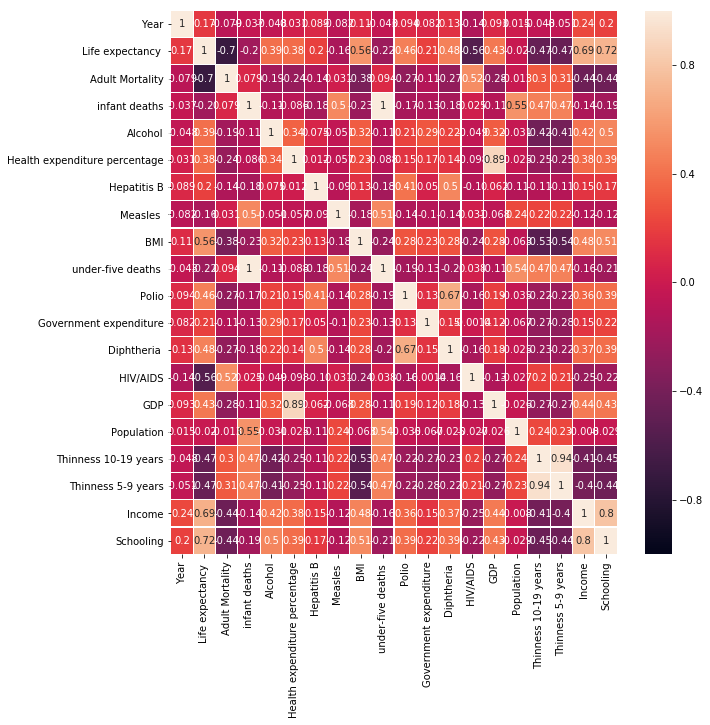

In [9]:
#PLOTTING A HEATMAP
df_kor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor,vmin=-1,vmax=1,annot=True,linewidth=0.1)

In [11]:
#PLOTTING A PAIRPLOT
#sns.pairplot(df)

# TRAINING AND TESTING DATASET

In [12]:
#SPLITTING THE DATASET
Y = df['Life expectancy ']
X = df[df.columns.difference(['Life expectancy '])]

In [13]:
#SEE NUMERICAL COLUMNS
df.select_dtypes(include=['int64','float64']).columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'Health expenditure percentage', 'Hepatitis B', 'Measles ',
       'BMI', 'under-five deaths ', 'Polio', 'Government expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', 'Thinness 10-19 years',
       'Thinness 5-9 years', 'Income', 'Schooling'],
      dtype='object')

In [14]:
#SEE CATEGORICAL COLUMNS
df.select_dtypes(include=['object','bool']).columns

Index(['Country', 'Status'], dtype='object')

In [15]:
#IDENTIFY THE CATEGORICAL VALUES FOR COLUMN TRANSFORM
categorical_features = ['Country','Status']
categorical_feature_mask = X.dtypes == object
catrgorical_features = X.columns[categorical_feature_mask].tolist()
#DEFINE CATEGORICAL PIPELINE
categorical_transformer = Pipeline(steps = [('onehot',OneHotEncoder(handle_unknown='ignore')),
                                           ])

In [16]:
#IDENTIFY THE NUMERICAL VALUES FOR COLUMN TRANSFORM
numeric_features = ['Year','Adult Mortality','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','under-five deaths','Polio',
                    'Total expenditure','Diptheria','HIV/AIDS','GDP','Population','thinness 1-19 years','thinness 5-9 years','Income composition of resources','Schooling']
numeric_feature_mask= X.dtypes!=object
numeric_features = X.columns[numeric_feature_mask].tolist()
#DEFINE NUMERIC PIPELINE
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
                   

In [17]:
#PIPELINING USING COLUMN TRANSFORM
preprocessor = ColumnTransformer(
               transformers = [
                   ('num',numeric_transformer,numeric_features),
                   ('cat',categorical_transformer,categorical_features)
               ]

)

In [18]:
#DEFINE A REGRESSOR MODEL USING PIPELINING FUNCTION
ExtraTreeRegressor = Pipeline([
    ('preprocessor',preprocessor),
    ('ExtraTreeRegressor',ExtraTreesRegressor(n_estimators=100,random_state=0))
])

In [19]:
#TRAIN-TEST SPLIT
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [20]:
#FIT THE TRAINING MODEL
reg = ExtraTreeRegressor.fit(X_train,Y_train)

In [21]:
#PREDICT THE TEST DATA VALUES
test_pred= reg.predict(X_test)
print(test_pred)

[81.3        69.743      58.652      57.735      61.653      71.001
 72.458      58.879      60.203      69.902      81.728      72.812
 75.527      66.178      58.101      72.224      69.586      73.106
 74.341      54.864      75.747      82.03       67.535      66.274
 72.172      64.849      59.933      69.26049863 63.672      68.624
 54.601      72.682      58.959      68.088      72.441      69.35
 64.169      54.228      72.363      73.535      82.316      62.092
 58.252      64.024      79.181      69.382      67.824      76.13
 68.574      55.857      72.496      72.105      48.473      52.05
 57.049      58.361      71.176      83.157      79.61       78.433
 55.475      63.591      49.208      72.331      54.613      60.622
 78.739      77.628      52.353      72.409      52.574      55.68
 72.174      67.575      73.777      66.255      67.852      64.64624932
 71.61349863 75.172      57.348      72.721      56.312      78.383
 77.058      58.884      74.063      62.065    

In [22]:
#ESTIMATING ERROR
print('Mean squared Error:',mean_squared_error(Y_test,test_pred))
print('R2 score:',r2_score(Y_test,test_pred)*100)

Mean squared Error: 1.8654527637127165
R2 score: 98.00936487478249


# MODEL BUILDING AND DEPLOYEMENT

In [23]:
wml_credentials = {
     "apikey": "l1m1Ha0wsGOpx495oGJKQ3826Qm2ollQVN9w3C9Q3vuZ",
  "iam_apikey_description": "Auto-generated for key c208e3f2-d9ee-4da1-85fa-830896cb6352",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/3b604045aa45403ea6c0084c32926efa::serviceid:ServiceId-caa633a9-9ba5-4729-a842-d5a3dfa41a06",
  "instance_id": "a39ea0c8-92f7-49dc-93f3-0278d46bea63",
  "url": "https://us-south.ml.cloud.ibm.com"
}
client = WatsonMachineLearningAPIClient(wml_credentials)
print(client.service_instance.get_url())

https://us-south.ml.cloud.ibm.com


In [24]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME:"SriValli Kota",
               client.repository.ModelMetaNames.AUTHOR_EMAIL:"17131a12A4gvpce.ac.in",
               client.repository.ModelMetaNames.NAME:"Life expectancy"
              }
#STORE THE MACHINE LEARNING MODEL
model_artifact = client.repository.store_model(ExtraTreeRegressor,meta_props=model_props)

In [25]:
#GET MODEL UID
model_uid = client.repository.get_model_uid(model_artifact)
#DEPLOY THE MODEL
create_deployement = client.deployments.create(model_uid,name="LifeExpectancyPrediction")



#######################################################################################

Synchronous deployment creation for uid: '3fdf47c6-1cdd-4e8b-9e5b-d22d373e839c' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='838594ba-7e45-4be7-8a4f-9f71f26bae18'
------------------------------------------------------------------------------------------------




In [26]:
#GET SCORING END POINT URL
scoring_endpoint = client.deployments.get_scoring_url(create_deployement)
print(scoring_endpoint)

https://us-south.ml.cloud.ibm.com/v3/wml_instances/a39ea0c8-92f7-49dc-93f3-0278d46bea63/deployments/838594ba-7e45-4be7-8a4f-9f71f26bae18/online
